## Methodology:

- Data will be divided into different groups on the basis of pareto analysis.

- A slice of data for 2010 will be taken out for the final testing. After creating 3 different models, this data will be tested .


In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import joblib

In [11]:
sns.set_style("whitegrid")

In [12]:
df= pd.read_csv("stage3.csv",index_col=0)

In [13]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
0,Afghanistan,2000,0.013896,0.065639,0.795517,0.001924,0.0,0.012411,1.111963,0.007581,0.157892,0.003800,0.565815,0.382126
1,Afghanistan,2001,0.034817,0.075552,0.816582,0.001060,0.0,0.020564,1.461090,0.005909,0.170245,0.003586,0.703912,0.387749
2,Afghanistan,2002,0.080074,0.085280,0.678975,0.001465,0.0,0.022338,1.385625,0.005172,0.139719,0.004991,0.703540,0.015021
3,Afghanistan,2003,0.124405,0.097893,0.665067,0.003312,0.0,0.024890,1.159752,0.005521,0.139696,0.005635,1.364174,0.013739
4,Afghanistan,2004,0.168035,0.111352,0.805915,0.003379,0.0,0.020600,1.085415,0.004780,0.121851,0.004538,0.152572,0.013314


<AxesSubplot:>

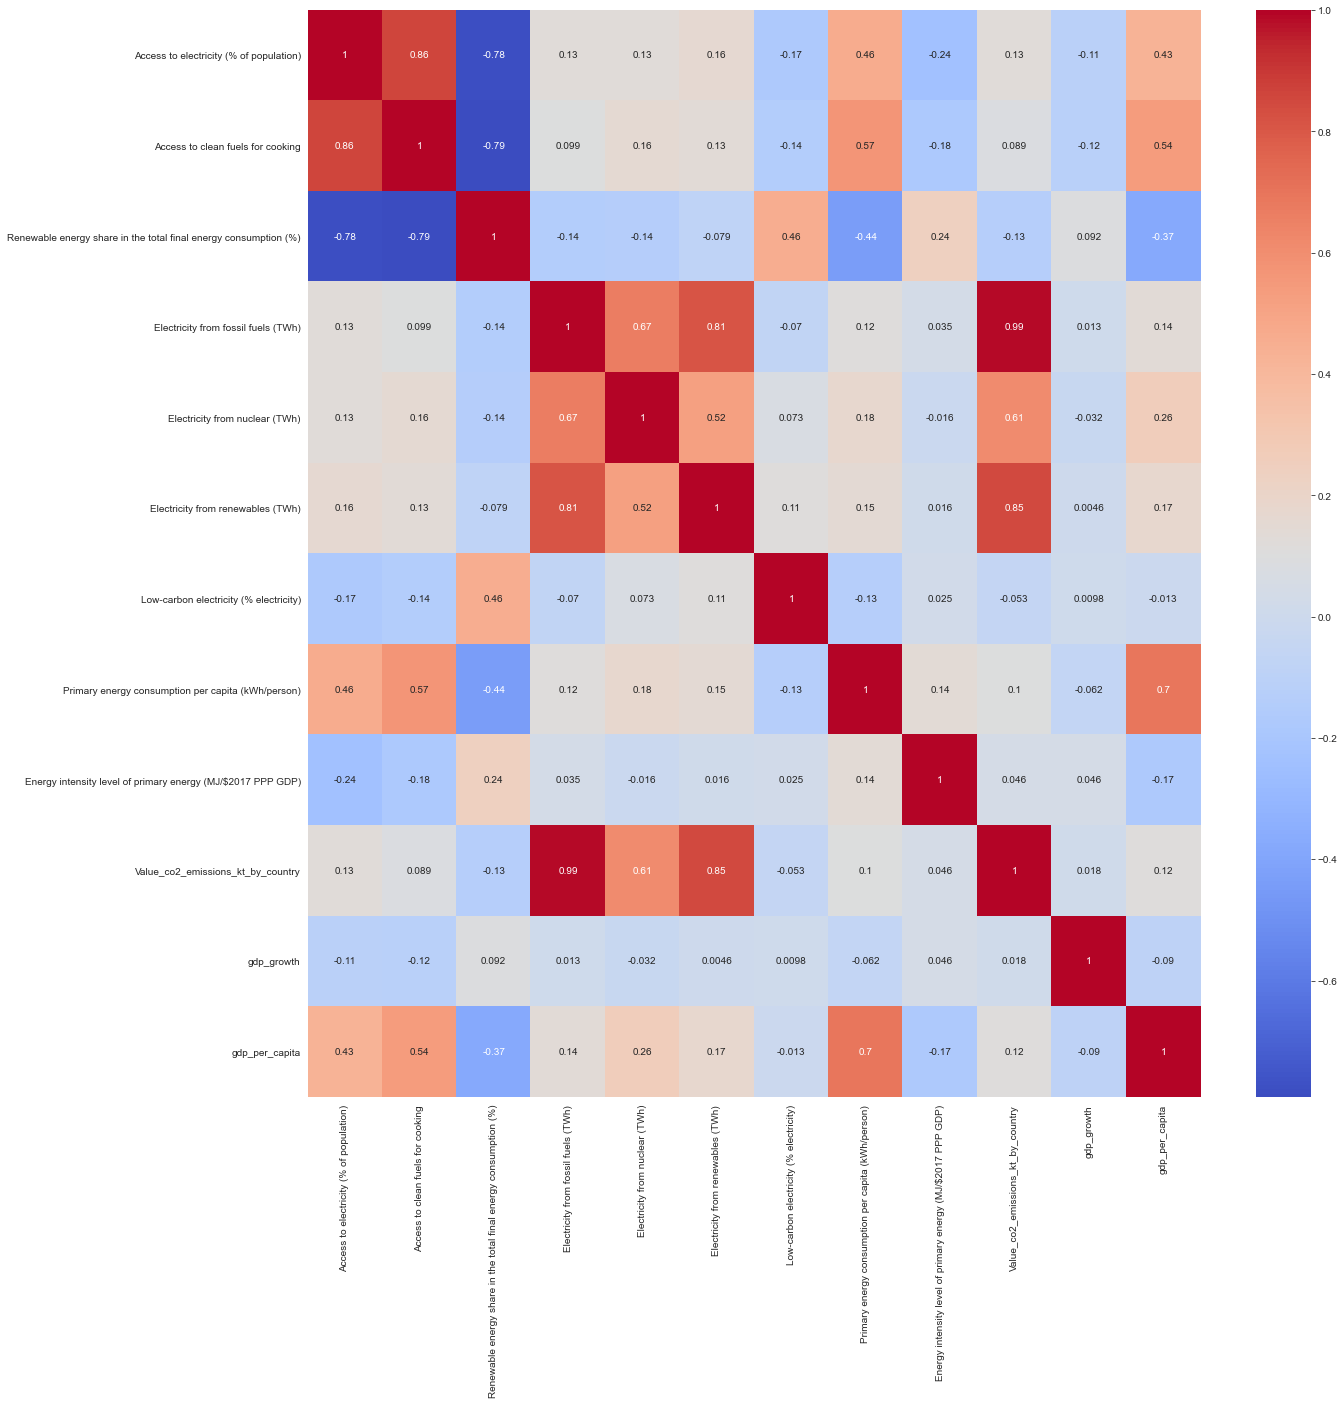

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop('Year',axis=1).corr(),annot=True,cmap='coolwarm')

In [15]:
# Series of countries with their descending order value of CO2 emissions. 
countries= df.groupby('Entity').mean()['Value_co2_emissions_kt_by_country'].sort_values(ascending=False)

**Countries have been divided into three groups on the basis of pareto analysis**

Group A countries which have combined  50% contribution to global CO2 emissions. From Pareto analysis it can be seen that these countries individually have more than an average 20% contribution to CO2 emissions.

Group B countries which have combined 30% contribution to global CO2 emissions. From Pareto analysis it can be seen that these countries individually have an average contribution in between 10% to 1% .  

Group C countries which have combined approx 20% contribution to global CO2 emissions. From Pareto analysis it can be seen that these countries individually have an average contribution in between 1% to 0%, but from this group, countries having less than 0.10 % average contribution have been omitted.


In [16]:
group_A= list(countries[countries>20].index)
group_B= list(countries[(countries<10) & (countries>1)].index)
group_C= list(countries[(countries<1) & (countries>0.10)].index)

In [17]:
df_a= df[df['Entity'].isin(group_A)]
df_b=df[df['Entity'].isin(group_B)]
df_c=df[df['Entity'].isin(group_C)]

In [18]:
#Slicing out data of 2010 from all the groups for last test.
df_a_2010= df_a[df_a['Year']==2010].drop('Year',axis=1)
df_b_2010= df_b[df_b['Year']==2010].drop('Year',axis=1)
df_c_2010= df_c[df_c['Year']==2010].drop('Year',axis=1)

In [19]:
#Remvoing Entity and Year from df_a,df_b, and df_c
df_a= df_a[df_a['Year']!=2010].drop(['Entity','Year'],axis=1)
df_b= df_b[df_b['Year']!=2010].drop(['Entity','Year'],axis=1)
df_c= df_c[df_c['Year']!=2010].drop(['Entity','Year'],axis=1)

## Group A Countries

<AxesSubplot:>

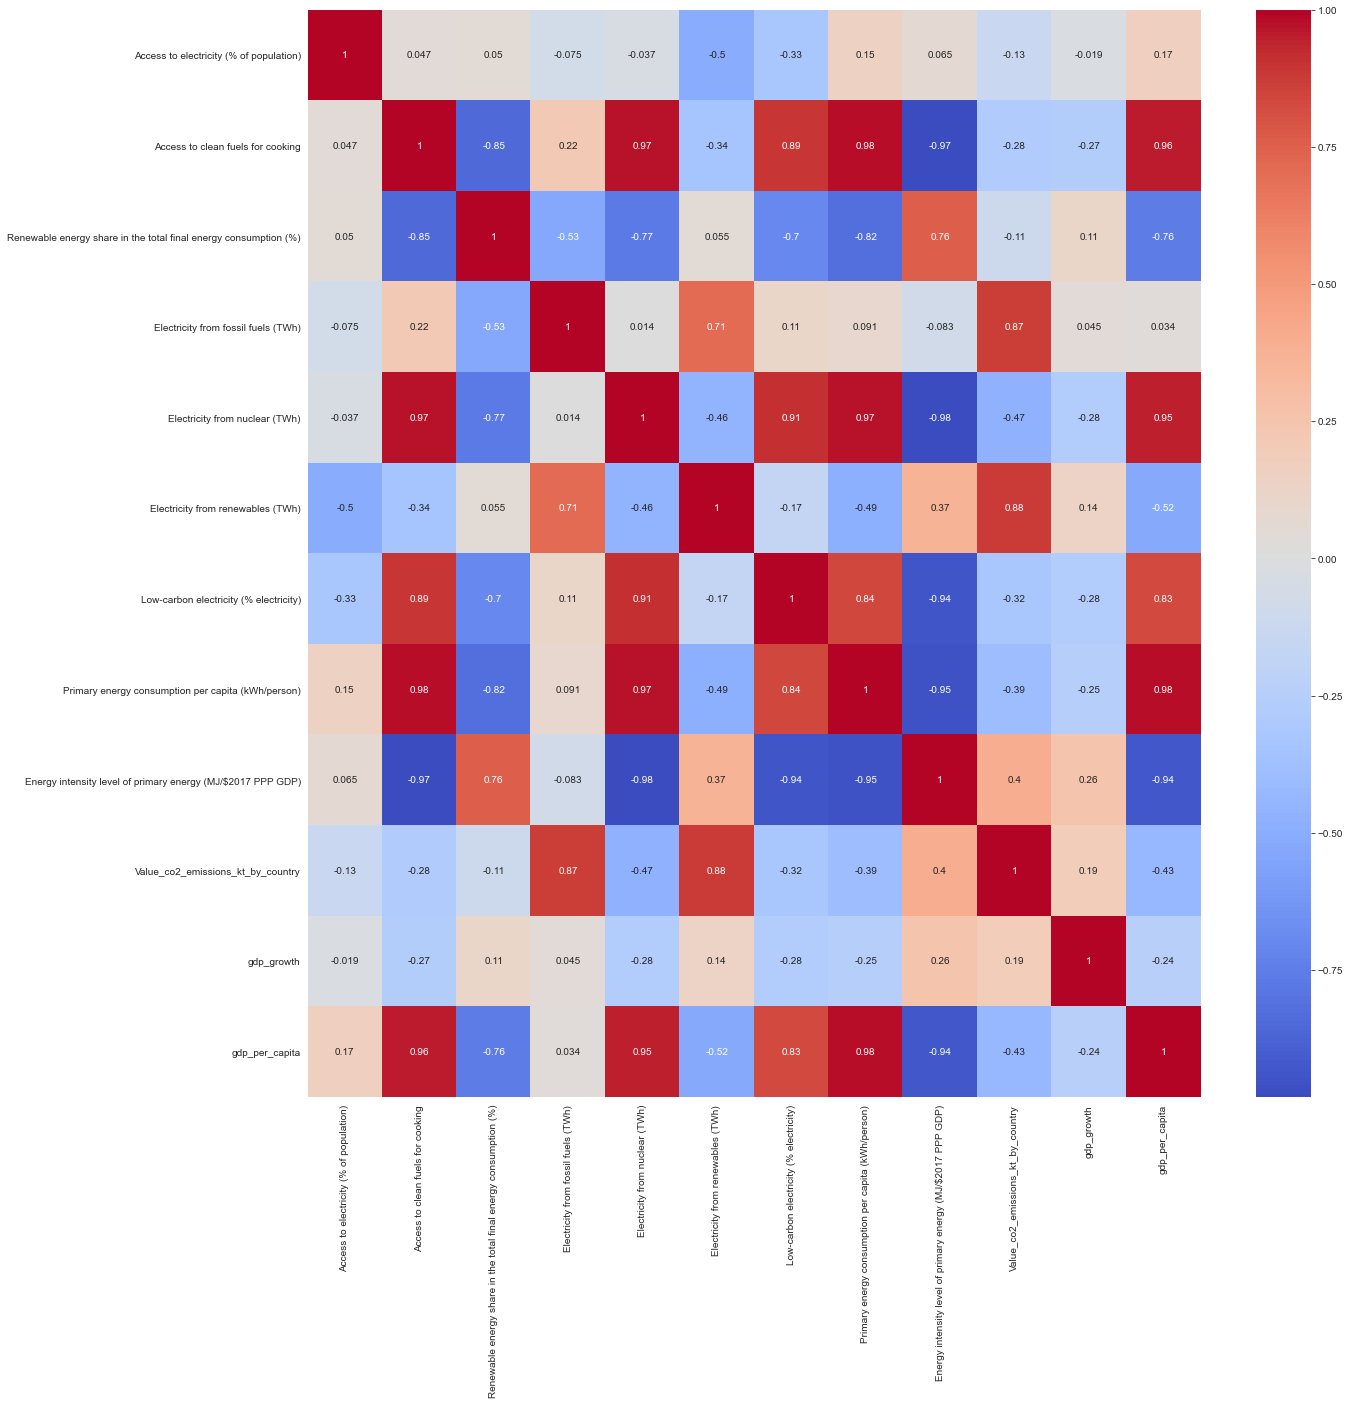

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_a.corr(),annot= True,cmap='coolwarm')

In [21]:
X= df_a.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_a['Value_co2_emissions_kt_by_country']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [25]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.3368126415399264
r2 score 0.9479635855572786
mean squared error 2.199161620343883
root mean square error 1.48295705276447
mean absoute percentage error 0.06021344825897717


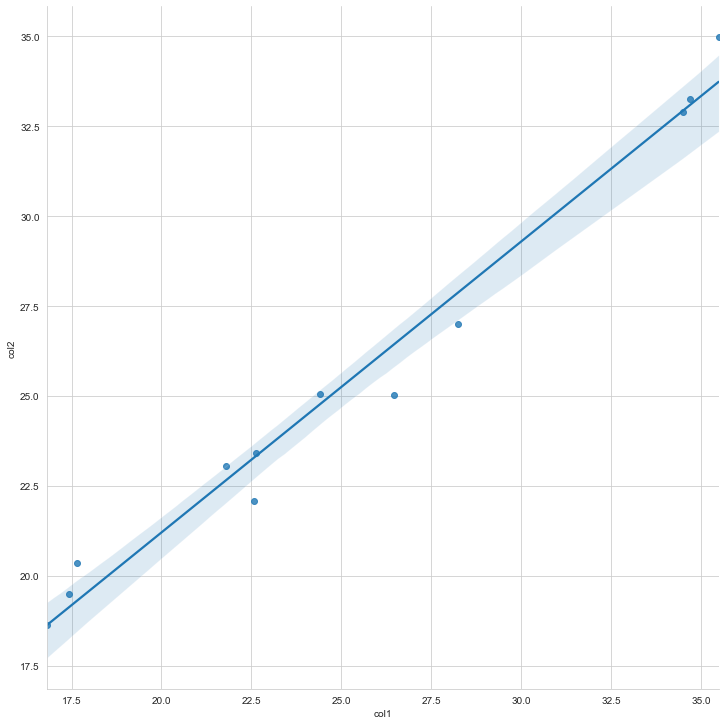

In [26]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})
sns.lmplot(x='col1',y='col2',data=check,height=10)

In [27]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [28]:
coef

,Coef,Features
0,0.000000,Access to electricity (% of population)
1,-0.000000,Access to clean fuels for cooking
2,-0.000000,Renewable energy share in the total final ener...
3,4.054894,Electricity from fossil fuels (TWh)
4,-0.300636,Electricity from nuclear (TWh)
5,1.574645,Electricity from renewables (TWh)
6,-0.000000,Low-carbon electricity (% electricity)
7,-0.000000,Primary energy consumption per capita (kWh/per...
8,1.009658,Energy intensity level of primary energy (MJ/$...
9,0.000000,gdp_growth


In [29]:
X= df_a[['Electricity from fossil fuels (TWh)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)']]
y= df_a['Value_co2_emissions_kt_by_country']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
grid_search_a= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search_a.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [33]:
predictions= grid_search_a.predict(X_test)

In [34]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.414594958989974
r2 score 0.9124045997547545
mean squared error 3.7019545716403566
root mean square error 1.9240464057918032
mean absoute percentage error 0.05986510436074488


In [35]:
df_a.describe()['Value_co2_emissions_kt_by_country']

count    38.000000
mean     24.991096
std       6.788586
min      16.270063
25%      17.900833
50%      24.560970
75%      30.150496
max      36.159663
Name: Value_co2_emissions_kt_by_country, dtype: float64

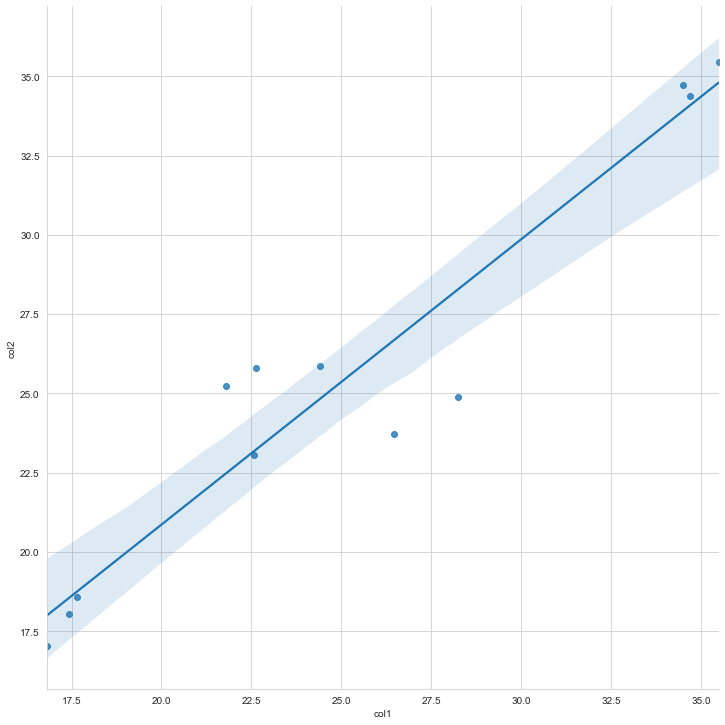

In [36]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})
sns.lmplot(x='col1',y='col2',data=check,height=10)

## Group B Countries 

<AxesSubplot:>

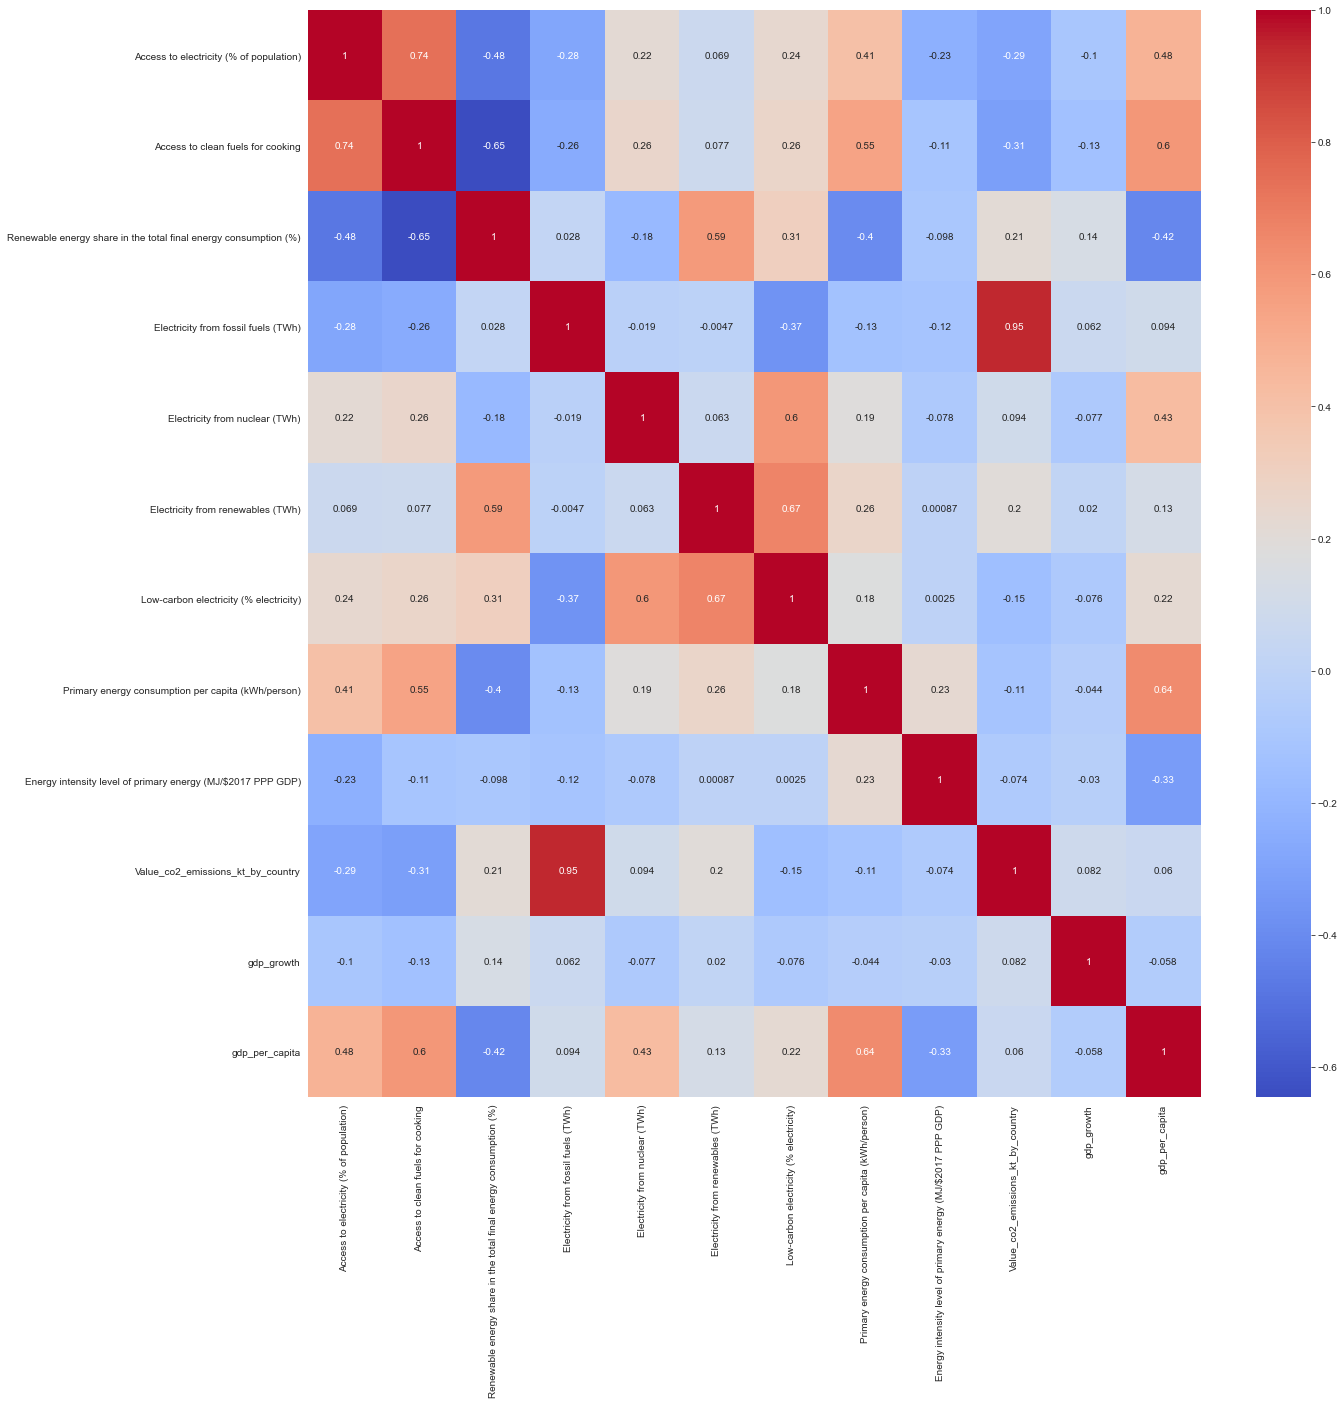

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df_b.corr(),annot= True,cmap='coolwarm')

In [38]:
X= df_b.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_b['Value_co2_emissions_kt_by_country']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [42]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.8022838362016657
r2 score 0.3725865199899856
mean squared error 1.4827151410551371
root mean square error 1.2176679108259103
mean absoute percentage error 0.40005499648904813


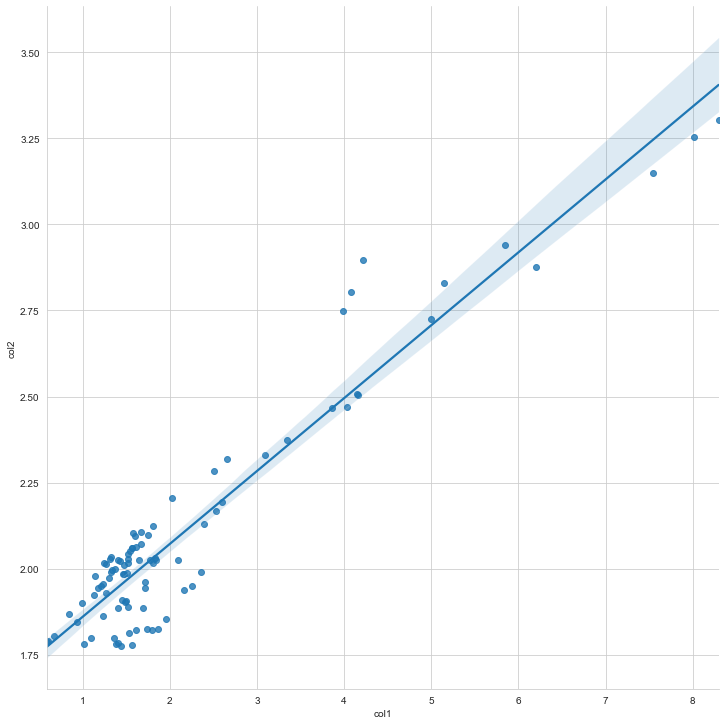

In [43]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})
sns.lmplot(x='col1',y='col2',data=check,height=10)

In [44]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [45]:
coef

,Coef,Features
0,-0.000000,Access to electricity (% of population)
1,-0.000000,Access to clean fuels for cooking
2,0.000000,Renewable energy share in the total final ener...
3,0.324901,Electricity from fossil fuels (TWh)
4,0.000000,Electricity from nuclear (TWh)
5,0.000000,Electricity from renewables (TWh)
6,-0.000000,Low-carbon electricity (% electricity)
7,-0.000000,Primary energy consumption per capita (kWh/per...
8,-0.000000,Energy intensity level of primary energy (MJ/$...
9,0.000000,gdp_growth


**Only Electricity from fossil fuels (TWh) is a contributing feature in group B countries.**

In [46]:
X= df_b['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y= df_b['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
grid_search_b= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search_b.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [49]:
predictions= grid_search_b.predict(X_test)

In [50]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.33573440204353167
r2 score 0.9090384225435966
mean squared error 0.21496208233638261
root mean square error 0.4636400353036638
mean absoute percentage error 0.1851329144606357


In [51]:
df_b.describe()['Value_co2_emissions_kt_by_country']

count    304.000000
mean       2.121263
std        1.445308
min        0.590086
25%        1.371788
50%        1.601616
75%        2.137398
max        8.295242
Name: Value_co2_emissions_kt_by_country, dtype: float64

Text(0, 0.5, 'predictions')

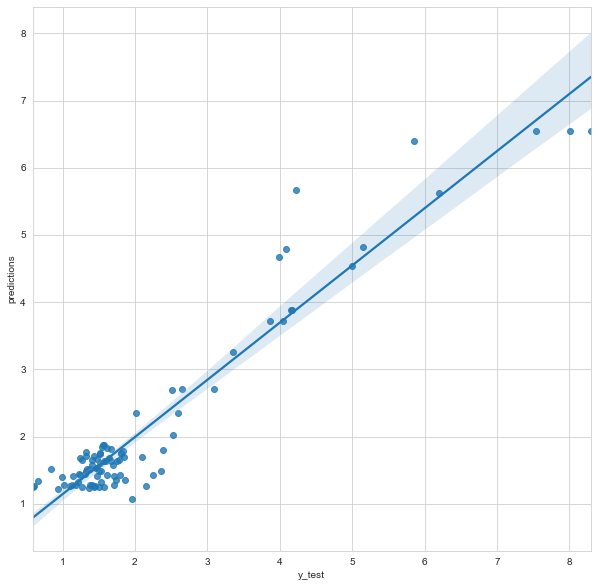

In [52]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")

## Group C Countries

<AxesSubplot:>

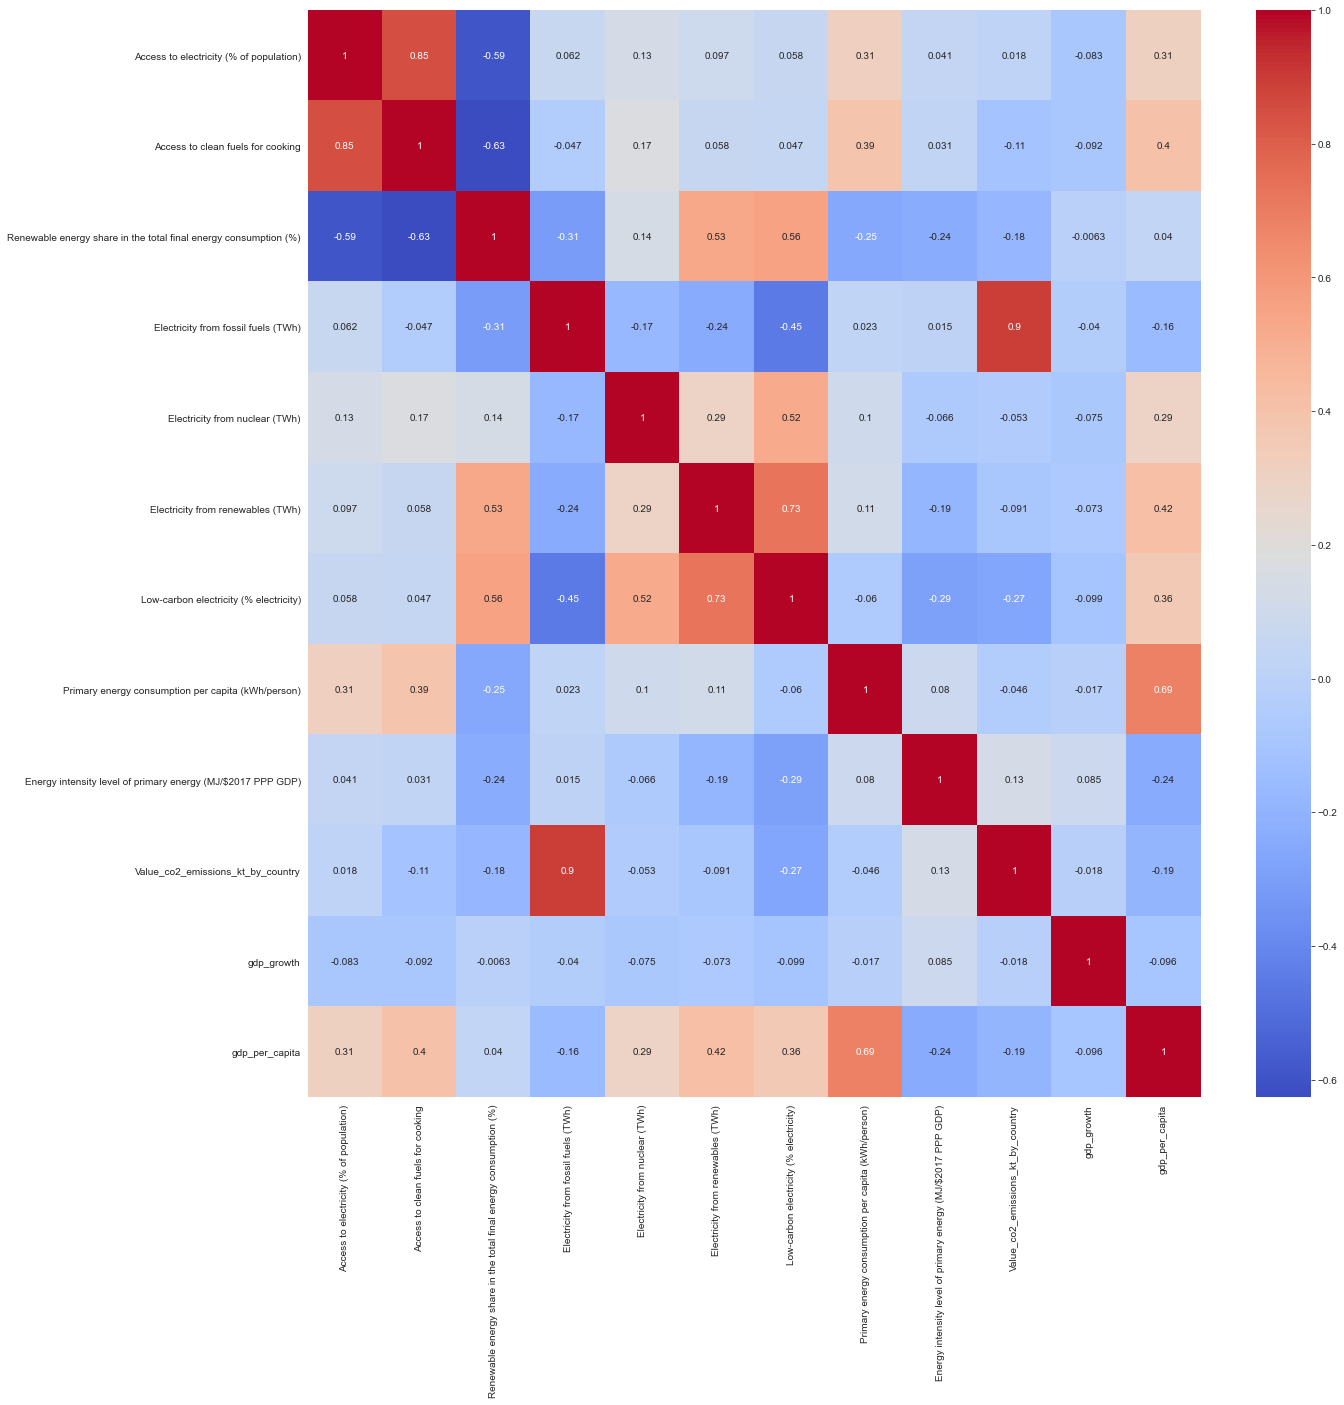

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(df_c.corr(),annot= True,cmap='coolwarm')

In [54]:
X= df_c.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_c['Value_co2_emissions_kt_by_country']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [58]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.15984729701834466
r2 score -0.0029297541491424273
mean squared error 0.03858145032183559
root mean square error 0.19642161368300481
mean absoute percentage error 0.7055390000642596


In [59]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [60]:
coef

,Coef,Features
0,-0.0,Access to electricity (% of population)
1,-0.0,Access to clean fuels for cooking
2,-0.0,Renewable energy share in the total final ener...
3,0.0,Electricity from fossil fuels (TWh)
4,-0.0,Electricity from nuclear (TWh)
5,-0.0,Electricity from renewables (TWh)
6,-0.0,Low-carbon electricity (% electricity)
7,-0.0,Primary energy consumption per capita (kWh/per...
8,0.0,Energy intensity level of primary energy (MJ/$...
9,-0.0,gdp_growth


**Observations:** <br>
- From Coeffciants it looks like there is no considerable impact of features. Lets try to calculate using Electricity from fossil fuels (TWh) which has highest correlation with the target variable.

In [61]:
X= df_c['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y= df_c['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
grid_search_c= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search_c.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [64]:
predictions= grid_search_c.predict(X_test)

In [65]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.06135692785343245
r2 score 0.8273495040941566
mean squared error 0.006641648134651934
root mean square error 0.08149630749090374
mean absoute percentage error 0.2702416992258429


In [66]:
df_c.describe()['Value_co2_emissions_kt_by_country']

count    848.000000
mean       0.311731
std        0.198878
min        0.087501
25%        0.160936
50%        0.245361
75%        0.406014
max        0.949100
Name: Value_co2_emissions_kt_by_country, dtype: float64

Text(0, 0.5, 'predictions')

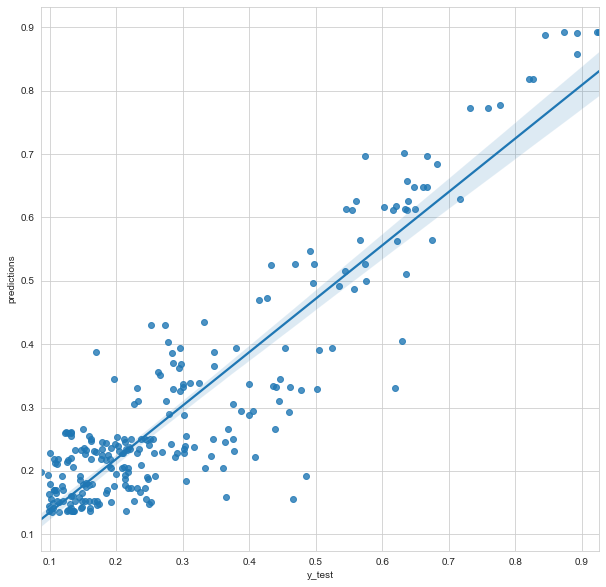

In [149]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")

# Evaluation of models on 2010 data.

In [67]:
X_a= df_a_2010[['Electricity from fossil fuels (TWh)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)']]
y_a= df_a_2010['Value_co2_emissions_kt_by_country']

In [68]:
predictions_a= grid_search_a.predict(X_a)

In [69]:
print("mean absolute error",mean_absolute_error(y_a,predictions_a))
print("r2 score",r2_score(y_a,predictions_a))
print("mean squared error",mean_squared_error(y_a,predictions_a))
print("root mean square error",np.sqrt(mean_squared_error(y_a,predictions_a)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_a,predictions_a))

mean absolute error 1.88801290023836
r2 score 0.8912938875780482
mean squared error 3.584096402213579
root mean square error 1.8931709912772219
mean absoute percentage error 0.0781630673944791


In [70]:
df_a_2010.describe()['Value_co2_emissions_kt_by_country']

count     2.000000
mean     25.828521
std       8.120408
min      20.086525
25%      22.957523
50%      25.828521
75%      28.699519
max      31.570517
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [71]:
X_b= df_b_2010['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y_b= df_b_2010['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [72]:
predictions_b= grid_search_b.predict(X_b)

In [73]:
print("mean absolute error",mean_absolute_error(y_b,predictions_b))
print("r2 score",r2_score(y_b,predictions_b))
print("mean squared error",mean_squared_error(y_b,predictions_b))
print("root mean square error",np.sqrt(mean_squared_error(y_b,predictions_b)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_b,predictions_b))

mean absolute error 0.2727629686704309
r2 score 0.9250946277263643
mean squared error 0.13181681286147423
root mean square error 0.3630658519628006
mean absoute percentage error 0.14160512363501618


In [74]:
df_b_2010.describe()['Value_co2_emissions_kt_by_country']

count    16.000000
mean      2.037957
std       1.370072
min       1.001773
25%       1.406624
50%       1.566117
75%       1.847992
max       6.183707
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [75]:
X_c= df_c_2010['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y_c= df_c_2010['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [76]:
predictions_c= grid_search_c.predict(X_c)

In [77]:
print("mean absolute error",mean_absolute_error(y_c,predictions_c))
print("r2 score",r2_score(y_c,predictions_c))
print("mean squared error",mean_squared_error(y_c,predictions_c))
print("root mean square error",np.sqrt(mean_squared_error(y_c,predictions_c)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_c,predictions_c))

mean absolute error 0.054709659860299756
r2 score 0.8529954067042503
mean squared error 0.005629657764562128
root mean square error 0.0750310453383273
mean absoute percentage error 0.21954690491987544


In [78]:
df_c_2010.describe()['Value_co2_emissions_kt_by_country']

count    45.000000
mean      0.303641
std       0.197904
min       0.090559
25%       0.175381
50%       0.229731
75%       0.397550
max       0.873105
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [79]:
df_a_2010['Predicted_V']= predictions_a
df_b_2010['Predicted_V']= predictions_b
df_c_2010['Predicted_V']= predictions_c

In [81]:
df_2010= pd.concat([df_a_2010,df_b_2010,df_c_2010])

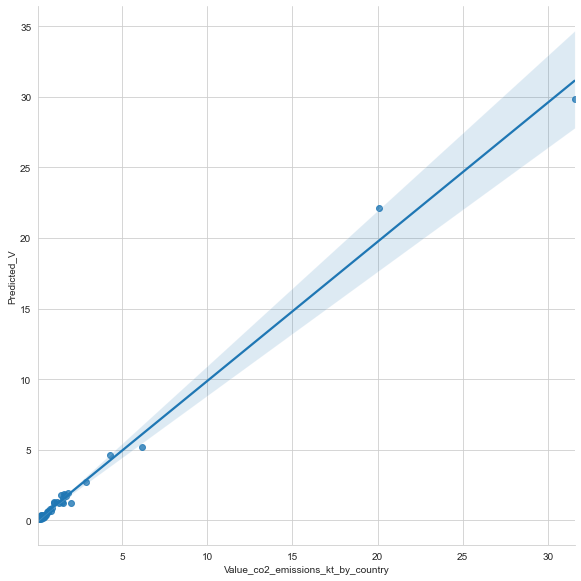

In [82]:
sns.lmplot(x='Value_co2_emissions_kt_by_country',y='Predicted_V',data= df_2010,height=8)

In [84]:
a= df_2010['Value_co2_emissions_kt_by_country']
b= df_2010['Predicted_V']

In [85]:
print("mean absolute error",mean_absolute_error(a,b))
print("r2 score",r2_score(a,b))
print("mean squared error",mean_squared_error(a,b))
print("root mean square error",np.sqrt(mean_squared_error(a,b)))
print("mean absoute percentage error",mean_absolute_percentage_error(a,b))

mean absolute error 0.168288380839954
r2 score 0.9929320573721547
mean squared error 0.15127930808914358
root mean square error 0.38894640773394934
mean absoute percentage error 0.19526379102132718


In [88]:
df_2010.to_csv("Data_2010.csv")

In [90]:
#Saving Models
joblib.dump(grid_search_a,"group_A.pkl")
joblib.dump(grid_search_b,"group_B.pkl")
joblib.dump(grid_search_c,"group_C.pkl")

['group_C.pkl']